# Data Preprocessing

## Import neccesary libarys

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the DataSet

In [36]:
# Load the dataset
# data = pd.read_csv('bank.csv' , sep=';')
data = pd.read_csv('bank-full.csv' , sep=';')

# View the first few rows
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [37]:
#view the last few rows
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


## Sanity check data

In [38]:
# Check the shape of the data
# cloums and rows
data.shape

(4521, 17)

In [39]:
# Check column information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [40]:
# Check for missing values
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [41]:
#check for duplicates
data.duplicated().sum()

np.int64(0)

In [42]:
#identify the unique values and garbage values
for i in data.select_dtypes(include='object').columns:
    print(f'\nUnique values in {i} are {data[i].unique()}')


Unique values in job are ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']

Unique values in marital are ['married' 'single' 'divorced']

Unique values in education are ['primary' 'secondary' 'tertiary' 'unknown']

Unique values in default are ['no' 'yes']

Unique values in housing are ['no' 'yes']

Unique values in loan are ['no' 'yes']

Unique values in contact are ['cellular' 'unknown' 'telephone']

Unique values in month are ['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']

Unique values in poutcome are ['unknown' 'failure' 'other' 'success']

Unique values in y are ['no' 'yes']


## Missing Value Treatment

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [44]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values
for col in data.columns:
    if data[col].isnull().sum() > 0:
        # For categorical columns
        if data[col].dtype == 'object':
            data[col].fillna(data[col].mode()[0], inplace=True) 
        else:
            data[col].fillna(data[col].median(), inplace=True)  # Fill numerical with median

print("Missing values treated.")


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
Missing values treated.


In [45]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## Duplicate and Garbage value treatment

In [46]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicates
data = data.drop_duplicates()

Number of duplicate rows: 0


## Exploratory Data Analysis (EDA)

In [47]:
# Descriptive statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
day,4521.0,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0


In [48]:
data.describe(include='object').T

,count,unique,top,freq
job,4521,12,management,969
marital,4521,3,married,2797
education,4521,4,secondary,2306
default,4521,2,no,4445
housing,4521,2,yes,2559
loan,4521,2,no,3830
contact,4521,3,cellular,2896
month,4521,12,may,1398
poutcome,4521,4,unknown,3705
y,4521,2,no,4000


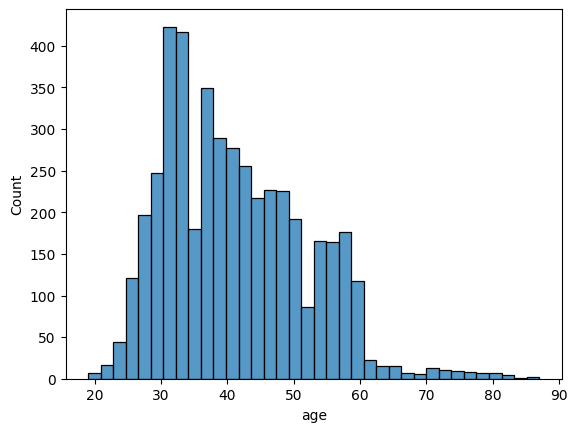

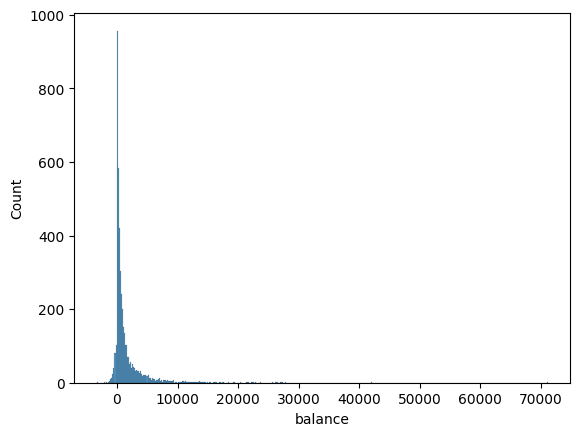

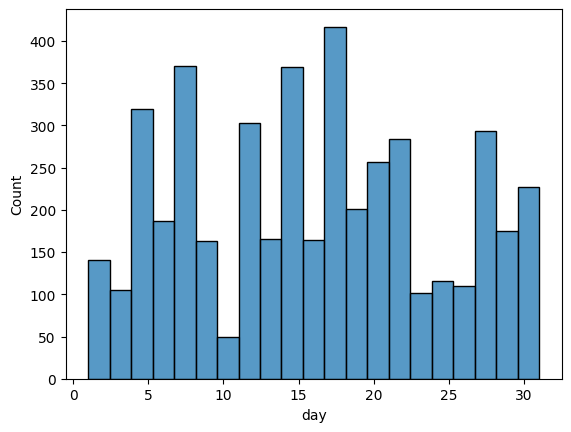

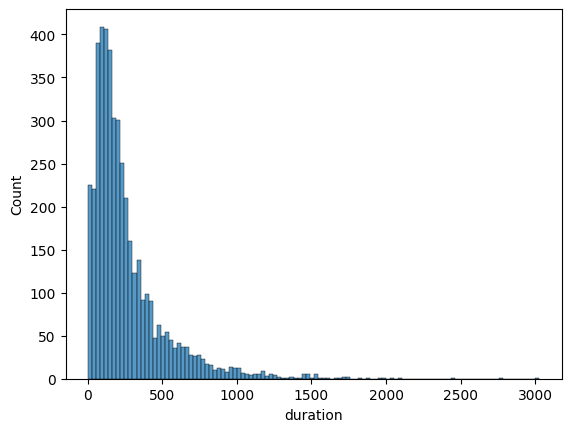

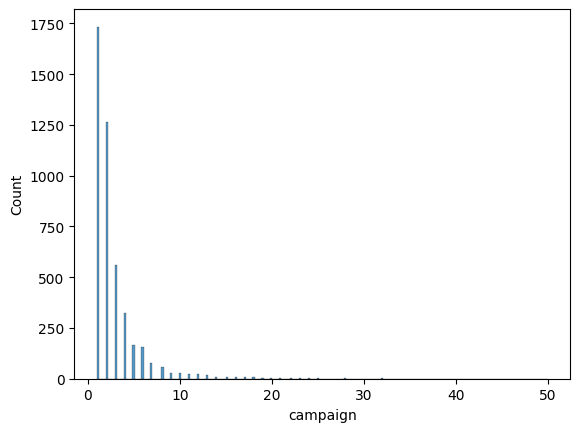

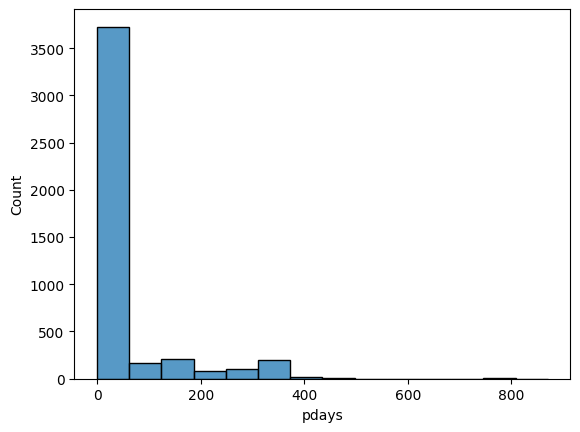

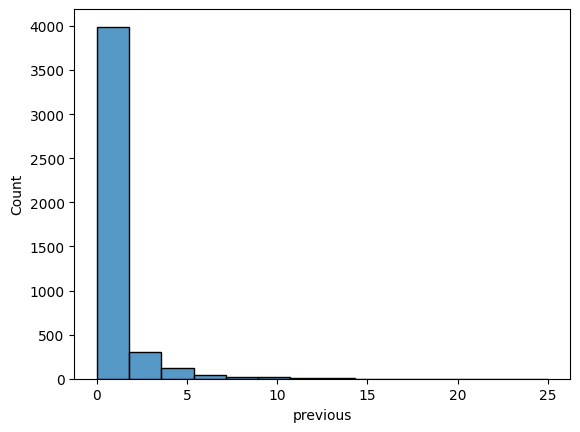

In [49]:
#histogram to understand the distribution of the data
for i in data.select_dtypes(include='number').columns:
    sns.histplot(data=data, x= i)
    plt.show()

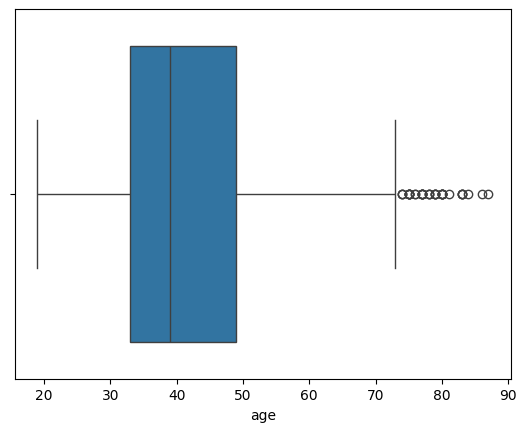

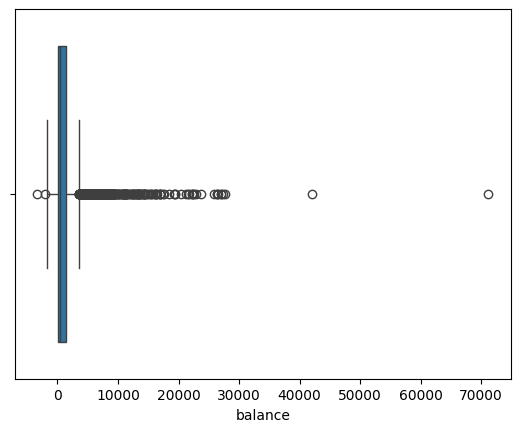

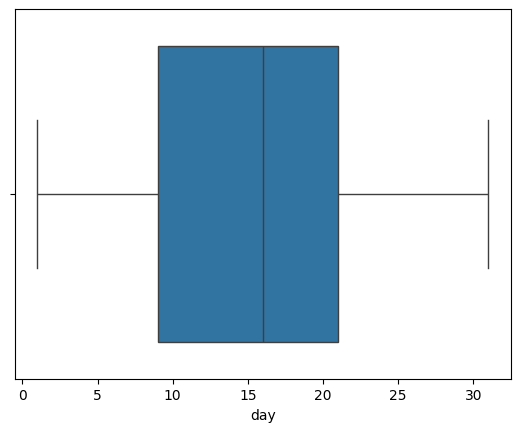

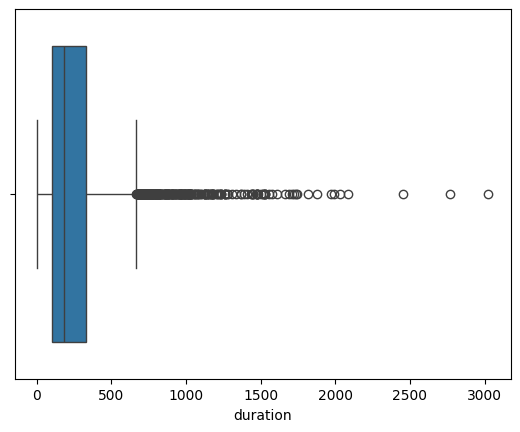

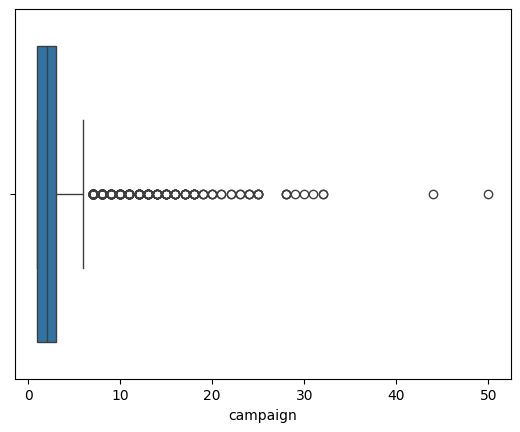

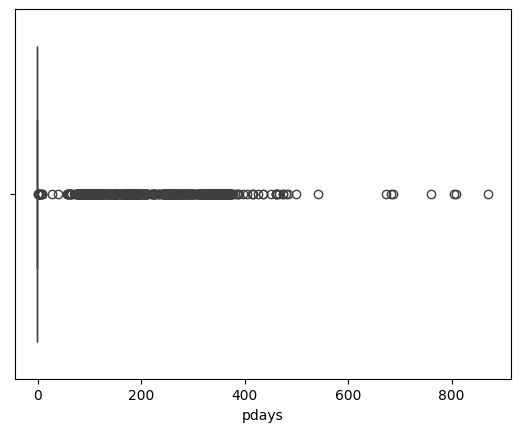

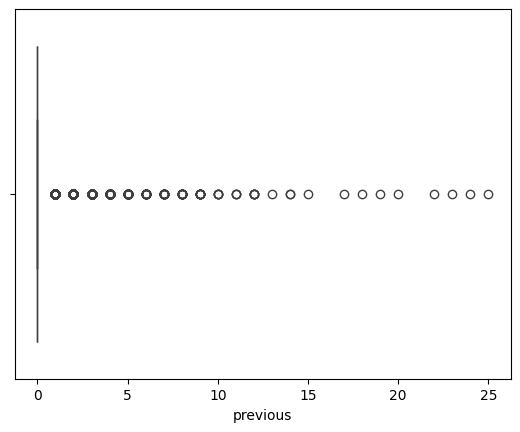

In [50]:
# Boxplot to identify the outliers
for i in data.select_dtypes(include='number').columns:
    sns.boxplot(data=data, x= i)
    plt.show()

In [51]:
# #scatter plot to understand the relationship between the variables
# for i in ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']:
#     sns.scatterplot(data=data, x=i, y=data['y'])
#     plt.show() 

In [52]:
data.select_dtypes(include='number').columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

<Axes: >

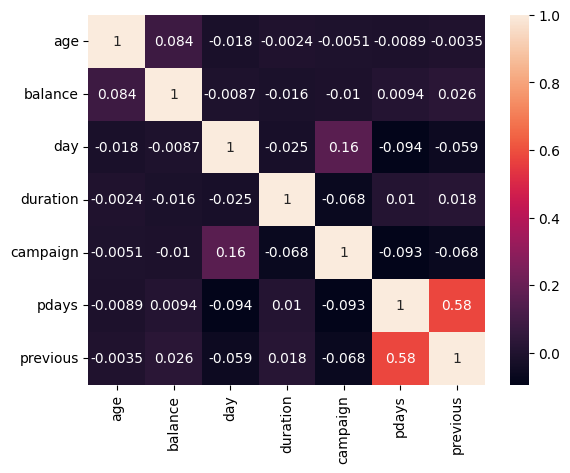

In [53]:
#correlation heatmap to interpreat the realationship and mulitcollinearity 
s = data.select_dtypes(include='number').corr()
sns.heatmap(s, annot=True)

## Outlier Treatment

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [55]:
# for col in ['age', 'balance', 'campaign', 'duration']:
#     if data[col].dtype == 'int64':
#         # Calculate IQR for detecting outliers
#         Q1 = data[col].quantile(0.25)
#         Q3 = data[col].quantile(0.75)
#         IQR = Q3 - Q1

#         # Define the lower and upper limits for outliers
#         lower_limit = Q1 - 1.5 * IQR
#         upper_limit = Q3 + 1.5 * IQR

#         # Cap the values in the column to the defined limits
#         data[col] = np.where(data[col] < lower_limit, lower_limit, data[col])
#         data[col] = np.where(data[col] > upper_limit, upper_limit, data[col])

#         # Convert the column to integer type if it originally contained integers
    
#         data[col] = data[col].astype(int)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


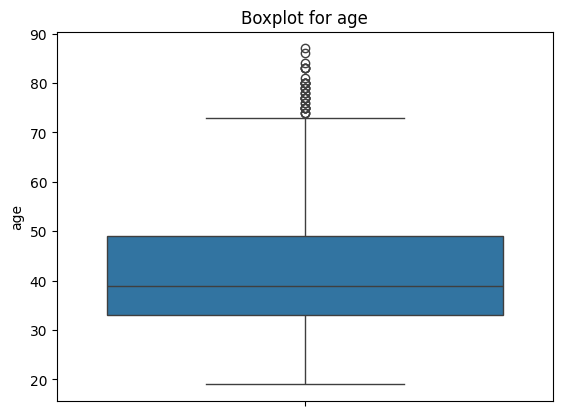

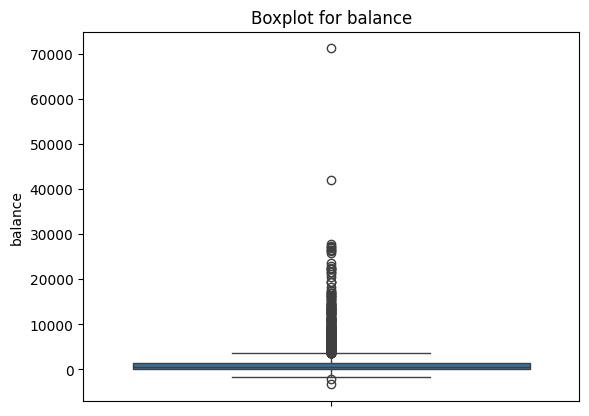

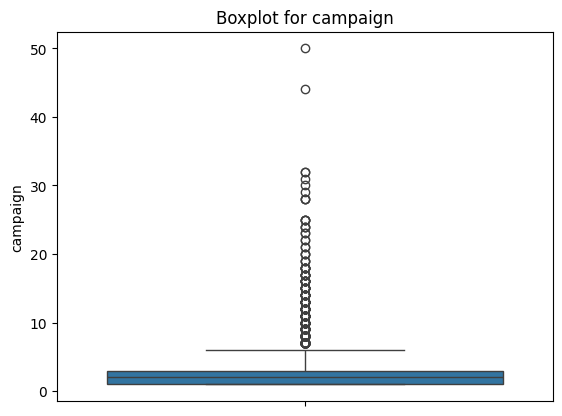

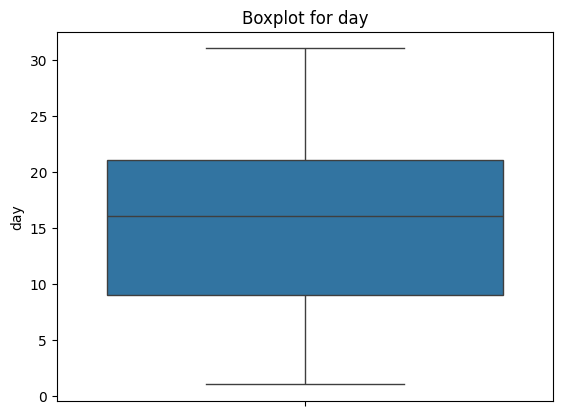

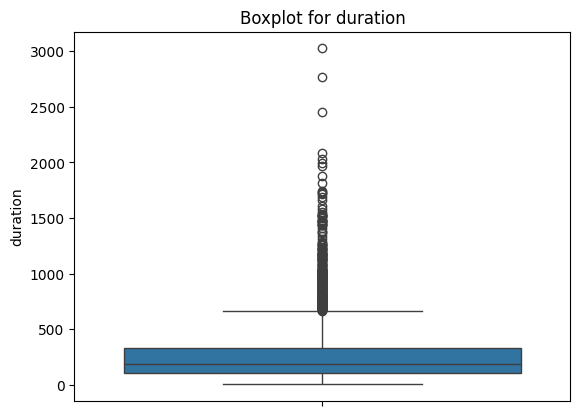

In [57]:

for col in ['age', 'balance', 'campaign', 'day', 'duration']:
    sns.boxplot(data[col])
    plt.title(f"Boxplot for {col}")
    plt.show()


# Feature Engineering

## Feature transformation

## Encoding the data

In [58]:
# data.info()

In [59]:
# Binary Features
binary_columns = ['default', 'housing', 'loan', 'y']

for col in binary_columns:
    data[col] = data[col].map({'yes': 1, 'no': 0})


In [60]:
# Categorical Features
categorical_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome'] 

# for col in categorical_columns:
#     data[col] = data[col].astype('category')

data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# data = data.astype('int64')


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  4521 non-null   int64
 1   default              4521 non-null   int64
 2   balance              4521 non-null   int64
 3   housing              4521 non-null   int64
 4   loan                 4521 non-null   int64
 5   day                  4521 non-null   int64
 6   duration             4521 non-null   int64
 7   campaign             4521 non-null   int64
 8   pdays                4521 non-null   int64
 9   previous             4521 non-null   int64
 10  y                    4521 non-null   int64
 11  job_blue-collar      4521 non-null   bool 
 12  job_entrepreneur     4521 non-null   bool 
 13  job_housemaid        4521 non-null   bool 
 14  job_management       4521 non-null   bool 
 15  job_retired          4521 non-null   bool 
 16  job_self-employed    452

In [62]:
# data.info()

In [63]:
# data.shape

In [64]:
# data.head()

In [65]:
# # Save the processed DataFrame to a CSV file
# data.to_csv("processed_t.csv", index=False)  # Use index=False to avoid saving the index as a separate column

#  Normalize/Scale Numerical Features 

In [66]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [67]:
data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0.161765,0,0.068455,0,0,19,0.024826,0.000000,0.000000,0.00,...,False,False,False,False,False,True,False,False,False,True
1,0.205882,0,0.108750,1,1,11,0.071500,0.000000,0.389908,0.16,...,False,False,False,True,False,False,False,False,False,False
2,0.235294,0,0.062590,1,0,16,0.059914,0.000000,0.379587,0.04,...,False,False,False,False,False,False,False,False,False,False
3,0.161765,0,0.064281,1,1,3,0.064548,0.061224,0.000000,0.00,...,False,True,False,False,False,False,False,False,False,True
4,0.588235,0,0.044469,1,0,5,0.073486,0.000000,0.000000,0.00,...,False,False,False,True,False,False,False,False,False,True


# Split the Data

In [68]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = data.drop('y', axis=1)  # Assuming 'y' is your target column
y = data['y']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# RF

# NN

# saving the model